# Data Science & Business Analytics Internship 
## Task -2: Prediction Using Unsupervised ML
## By- Neel Patel
### Problem Statement:
From the given "Iris" Dataset, predict the optimim number of cluster and represent it visually

### Step1 - Importing Necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
df = pd.read_csv("task_data/Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Check Any missing values

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Summary of Dataset

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Metadata of the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Finding the number of optimum clusters using Elbow method

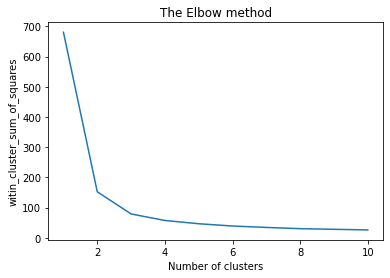

In [6]:
x = df.iloc[:,[1,2,3,4]].values

from sklearn.cluster import KMeans
wcss = [] #within_cluster_sum_of_squares

for i in range(1, 11):
    #model_1 = KMeans(n_clusters=i, init = 'k-means++', max_iter= 300, n_init=10,random_state=0)
    model_1 = KMeans(i)
    model_1.fit(x)
    wcss.append(model_1.inertia_)

#plt.figure(figsize=(16,9))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('witin_cluster_sum_of_squares')
plt.show()

### so, from the above graph we define that the optimum number of cluster is 3

## Applying Kmeans clustering algorithm

In [7]:
model = KMeans( 
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0)
y_pred = model.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visulization of the given Data

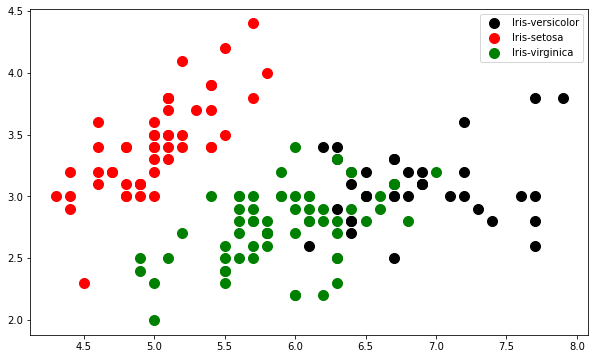

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1],
           s = 100, c='black', label="Iris-versicolor")

plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1],
           s = 100, c='red', label="Iris-setosa")

plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
           s = 100, c='green', label="Iris-virginica")
plt.legend()
plt.show()

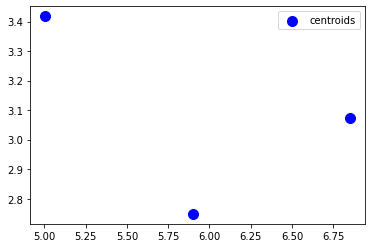

In [9]:
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
           s = 100, c='blue', label="centroids")

plt.legend()

## Visualaizing Total 

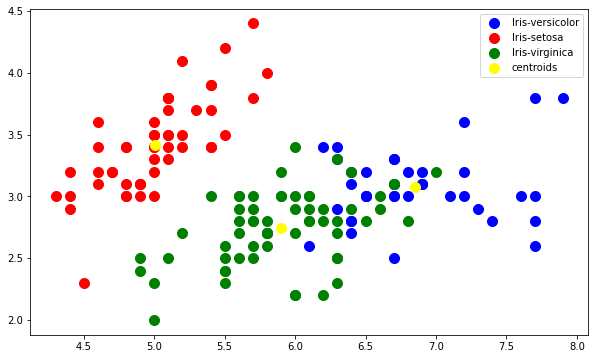

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1],
           s = 100, c='blue', label="Iris-versicolor")

plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1],
           s = 100, c='red', label="Iris-setosa")

plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
           s = 100, c='green', label="Iris-virginica")

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
           s = 100, c='yellow', label="centroids")
plt.legend()
plt.show()
